# Introduction to (deep) Probabilistic graphical models - Homework 1

CHAUVEAU Marion & SOTO David

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Ellipse

In [3]:
path = '/Users/marion/Desktop/MVA/Cours MVA/Probabilistic graphical models/data/'

# 1, Linear classification

In [4]:
#We read all the data files
#FILE A
data = open(path+"testA",'r')
testA = data.readlines()
data.close()
data = open(path+"trainA",'r')
trainA = data.readlines()
data.close()
#FILE B
data = open(path+"testB",'r')
testB = data.readlines()
data.close()
data = open(path+"trainB",'r')
trainB = data.readlines()
data.close()
#FILE C
data = open(path+"testC",'r')
testC = data.readlines()
data.close()
data = open(path+"trainC",'r')
trainC = data.readlines()
data.close()

In [5]:
#Function that create a file [(x1,y1),.....,(xn,yn)]
def read_data(data):
	DATA = []
	for line in data:
		line = line.split(' ')
		x = np.array(list(map(float,line[0:-1])))
		y = int(line[-1][1])
		DATA.append((x,y))
	DATA = np.array(DATA,dtype=[('X','object'),('Y','int')])
	return DATA

In [6]:
#Function that take the file [(x1,y1),.....,(xn,yn)] and create a matrix X of size dxn and a matrix Y of size n
def reshape_data(DATA):
	Y = np.reshape(DATA['Y'],(1,len(DATA['Y'])))
	X = np.zeros((2,len(DATA['X'])))
	for i in range(len(DATA['X'])):
		X[:,i]=DATA['X'][i]
		X[:,i]=DATA['X'][i]
	return X, Y

In [7]:
TrainA = read_data(trainA)
TestA = read_data(testA)
X_trainA,Y_trainA = reshape_data(TrainA)
X_testA, Y_testA = reshape_data(TestA)

TrainB = read_data(trainB)
TestB = read_data(testB)
X_trainB,Y_trainB = reshape_data(TrainB)
X_testB, Y_testB = reshape_data(TestB)

TrainC = read_data(trainC)
TestC = read_data(testC)
X_trainC,Y_trainC = reshape_data(TrainC)
X_testC, Y_testC = reshape_data(TestC)

## 1. Generative model (LDA)

**a. Derive the form of the maximum likelihood estimator for this model.**

Let ${ \left\{(x_i​,y_i​) \right\} }_{1⩽i⩽n}$ $\in (\mathbb{R}^{d} \times \left\{ 0, 1 \right\})^n$ be a i.i.d sample of n observations such that : $\forall i$ : $y_i \sim \mathcal{Bernoulli}(\pi_0)$ , $\forall k=1,...,n$ and $\forall i=0,1$ : $x_k | y_k = i \sim \mathcal{N}(\mu_i,\Sigma)$

We denote by $\pi_0$ the parameter of Bernoulli's law so as not to confuse it with the number $\pi$.
We define $\theta = ((\mu_k)_k,\Sigma)$ the parameters of the Gaussian laws. The data log-likelihood is given by :
$$L_{(x_i,z_i)_i}(\pi_0,\theta) = \log\left[p((x_i,y_i)_i| \pi_0,\theta)\right]$$ 
$$= \log\left[\prod_{i=1}^np((x_i,y_i)| \pi_0,\theta)\right]$$ 
$$=\sum_{i=1}^n \mathcal{N}(x_i ; \mu_{y_i}, \Sigma) \times \pi_0^{y_i}(1-\pi_0)^{1-y_i}$$
$$=\sum_{i=1}^n \log\left[\frac{1}{\left( 2 \pi \right)^{d/2} \left| \Sigma \right|^{1/2}} \exp \left[ - \frac{1}{2} \left( x_i - \mu_{y_i} \right)^\top \Sigma^{-1} \left( x_i - \mu_{y_i} \right) \right] \times  \pi_0^{y_i}(1-\pi_0)^{1-y_i}\right]$$
$$= \sum_{i=1}^n {\left[ -\frac{d}{2}\log(2\pi)-\frac{1}{2}\log(|\Sigma|)-\frac{1}{2} \left( x_i - \mu_{y_i} \right)^\top \Sigma^{-1} \left( x_i - \mu_{y_i} \right) + y_i\log(\pi_0)+(1-y_i)\log(1-\pi_0)\right]} $$
$$= -\frac{nd}{2}\log(2\pi)-\frac{n}{2}\log(|\Sigma|) + \sum_{i=1}^n \left[ -\frac{1}{2} \left( x_i - \mu_{y_i} \right)^\top \Sigma^{-1} \left( x_i - \mu_{y_i} \right) + y_i\log(\pi_0)+(1-y_i)\log(1-\pi_0) \right] $$

To obtain the maximum likelihood estimators we will now compute the gradients of $L_{(x_i,z_i)_i}(\pi_0,\theta)$ with respect to the different parameters.

**Likelihood estimator for $\pi_0$ :**

$$\frac{\partial L}{\partial \pi_0} = 0$$
$$\Leftrightarrow \frac{1}{\hat{\pi_0}} \sum_{i=1}^{n} y_{i} - \frac{1}{1 - \hat{\pi_0}} \sum_{i=1}^{n} (1 - y_{i})=0$$
$$\Leftrightarrow \frac{1}{\hat{\pi_0}(1-\hat{\pi_0})} \sum_{i=1}^{n} y_{i} - \frac{n}{1 - \hat{\pi_0}}=0$$
$$\Leftrightarrow \hat{\pi_0} = \frac{1}{n} \sum_{i=1}^{n} y_{i}$$

**Likelihood estimator for $\mu_i$ :**

$\forall j=0,1$ we have :
$$\frac{\partial L}{\partial \mu_j} = 0$$
$$ \Leftrightarrow \sum_{i=1}^{n}{\left[\Sigma^{-1} x_{i}\mathbb{1}_{y_i = j} - \Sigma^{-1}  \hat{\mu_{j}}\mathbb{1}_{y_i = j}\right]} = 0 $$
$$\Leftrightarrow  \Sigma^{-1} \sum_{i=1}^{n}{\left[ (x_{i} - \hat{\mu_{j}})\mathbb{1}_{y_i = j}\right]} = 0$$
$$\Leftrightarrow  \Sigma^{-1} \sum_{i=1}^{n}{\left[ (x_{i} - \hat{\mu_{j}})\mathbb{1}_{y_i = j}\right]} = 0$$
$$\Leftrightarrow \hat{\mu_i} = \frac{1}{n_j} \sum_{i=1}^{n} x_{i}\mathbb{1}_{y_i = j} \quad , \quad \quad n_j = \sum_{i=1}^{n} \mathbb{1}_{y_i = j}  $$

**Likelihood estimator for $\Sigma$ :**

$$\frac{\partial L}{\partial \Sigma} = 0_{d\times d}$$
$$\Leftrightarrow  \frac{\partial}{\partial \Sigma}\left[-\frac{n}{2}\log(|\hat{\Sigma}|)\right] + \frac{\partial}{\partial \Sigma}\left[\sum_{i=1}^n -\frac{1}{2} \left( x_i - \mu_{y_i} \right)^\top \hat{\Sigma}^{-1} \left( x_i - \mu_{y_i} \right)\right] = 0_{d\times d} $$
We have :
$$\frac{\partial}{\partial \Sigma}\left[\log(|\Sigma|)\right] = (\Sigma^{-1})^\top = \Sigma^{-1}$$
And :
$$ \frac{\partial}{\partial \Sigma}\left[\left( x_i - \mu_{y_i} \right)^\top \Sigma^{-1} \left( x_i - \mu_{y_i} \right)\right] = \frac{\partial}{\partial \Sigma}\left[Tr\left(\left( x_i - \mu_{y_i} \right)^\top \Sigma^{-1} \left( x_i - \mu_{y_i} \right)\right)\right] = - \Sigma^{-1}\left( x_i - \mu_{y_i} \right)\left( x_i - \mu_{y_i} \right)^\top\Sigma^{-1}$$
From those two derivatives we get :
$$-\frac{n}{2}\hat{\Sigma}^{-1} + \frac{n}{2}\hat{\Sigma}^{-1}\sum_{i=1}^n\left( x_i - \mu_{y_i} \right)\left( x_i - \mu_{y_i} \right)^\top\hat{\Sigma}^{-1} = 0_{d\times d}$$
$$\Leftrightarrow \hat{\Sigma} = \frac{1}{n} \sum_{i=1}^n\left( x_i - \mu_{y_i} \right)\left( x_i - \mu_{y_i} \right)^\top$$


**b. What is the form of the conditional distribution p(y = 1|x)? Compare with the form of logistic regression.**

Let us recall that $y \sim \mathcal{Bernoulli} (\pi)$ and that $\forall i=0,1$  $x | y=i \sim \mathcal{N} (\mu_i, \Sigma )$

With that in mind, we have :

$$p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x)}$$ 
i.e.
$$p(y=1|x) = \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1)+ p(x|y=0)p(y=0)} = \frac{\pi \mathcal{N}(x; \mu_1,\,\Sigma)}{\pi \mathcal{N}(x; \mu_1,\,\Sigma)+ (1-\pi)\mathcal{N}(x; \mu_0,\,\Sigma)}$$

$$p(y=1|x) = \frac{1}{1+ \frac{\exp(-(1/2) * (x-\mu_0)^T \Sigma^{-1} (x-\mu_0)) (1-\pi)}{\exp(-(1/2) * (x-\mu_1)^T \Sigma^{-1} (x-\mu_1)) \pi}} = \frac{1}{1+ \frac{1-\pi}{\pi} \exp{-(1/2) * (x-\mu_0)^T \Sigma^{-1} (x-\mu_0))+(1/2) * (x-\mu_1)^T \Sigma^{-1} (x-\mu_1)}}$$

We finally get :

$$p(y=1|x) = \dfrac{1}{1 + \exp(g(x))} = sigm(g(x))$$
The function $g$ is affine and we have :
$$p(y = 1 \mid x) = sigm(w^T x + b)$$
With
$$w = \Sigma^{-1} (\mu_1 - \mu_0)$$
$$b = - \ln \dfrac{1 - \pi}{\pi} \, - \, \dfrac{1}{2} \mu_1^T \Sigma^{-1} \mu_1 \, + \, \dfrac{1}{2} \mu_0^T \Sigma^{-1} \mu_0$$
It is exactly the form of a logistic regression.

**c. Implement the MLE for this model and apply it to the data. Represent graphically the data as a point cloud in $\mathbb{R}^{2}$ and the line defined by the equation**

In [7]:
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):

        if A[0,i]>0.5:
            Y_prediction[0,i]=1
        else:
            Y_prediction[0,i]=0
    
    return Y_prediction

In [98]:
#Function to print the results
def Results(Model,Y_train,Y_test):
	print('Learned parameters :')
	Theta_logReg = np.append(Model['w'],Model['b'])
	Theta_logReg /= np.linalg.norm(Theta_logReg)
	print('w = ',Theta_logReg[:-1])
	print('b =', Theta_logReg[-1])
	print("train accuracy: {} %".format(100 - np.mean(np.abs(Model['Y_prediction_train'] - Y_train)) * 100))
	print("test accuracy: {} %".format(100 - np.mean(np.abs(Model['Y_prediction_test'] - Y_test)) * 100))

**MLE estimator**

In [9]:
def MLE_estimator(X_train,Y_train,X_test):
	#pi
	Pi = np.mean(Y_train)
	#mu_j
	mask0 = np.reshape((Y_train==0),(Y_train.shape[1],))
	mask1 = np.reshape((Y_train==1),(Y_train.shape[1],))
	X0 = X_train[:,mask0]
	X1 = X_train[:,mask1]
	Mu0 = np.reshape(np.mean(X0,axis=1),(X_train.shape[0],1))
	Mu1 = np.reshape(np.mean(X1,axis=1),(X_train.shape[0],1))
	#Sigma
	Sigma = (np.dot((X0-Mu0),(X0-Mu0).T) + np.dot((X1-Mu1),(X1-Mu1).T))/X_train.shape[1]

	#parameters w and b
	Sigma_inv = np.linalg.inv(Sigma)
	w = np.dot(Sigma_inv,(Mu1-Mu0))
	b = -np.log((1-Pi)/Pi)- 1/2*(Mu1.T @ Sigma_inv @ Mu1 - Mu0.T @ Sigma_inv @ Mu0)
	b = b[0]

	#prediction
	Y_pred_test = predict(w,b,X_test)
	Y_pred_train = predict(w, b, X_train)

	d = {
         "Y_prediction_test": Y_pred_test, 
         "Y_prediction_train" : Y_pred_train, 
         "w" : w, 
         "b" : b}

	return d

In [99]:
#Function that plot the graph
def plot_graph(X,Y,w,b):
	X1 = X[0,:]
	mi,ma = np.min(X1),np.max(X1)
	X2 = X[1,:]
	Ones = (Y[0]==1)
	Zeros = (Y[0]==0)
	X1_Ones = X1[Ones]
	X2_Ones = X2[Ones]
	X1_Zeros = X1[Zeros]
	X2_Zeros = X2[Zeros]
	plt.plot(X1_Ones,X2_Ones,'o',color = 'orange')
	plt.plot(X1_Zeros,X2_Zeros,'o',color = 'blue')
	plt.plot([mi,ma],[(-b-w[0]*mi)/w[1],(-b-w[0]*ma)/w[1]],color='black')  
	# for the logistic regression the line equation is sigmoid(f(x))=1/2 which corresponds to w1*x1 + w2*x2 + b = 0

**Results for File A**

In [11]:
modelA_MLE = MLE_estimator(X_trainA,Y_trainA,X_testA)
Results(modelA_MLE,Y_trainA,Y_testA)

Learned parameters :
w =  [ 0.06184704 -0.19539377]
b = 0.97877281247206
train accuracy: 100.0 %
test accuracy: 99.0 %


**Results for File B**

In [12]:
modelB_MLE = MLE_estimator(X_trainB,Y_trainB,X_testB)
Results(modelB_MLE,Y_trainB,Y_testB)

Learned parameters :
w =  [ 0.19749034 -0.35291913]
b = 0.9145740263202945
train accuracy: 98.0 %
test accuracy: 95.5 %


**Results for File C**

In [13]:
modelC_MLE = MLE_estimator(X_trainC,Y_trainC,X_testC)
Results(modelC_MLE,Y_trainC,Y_testC)

Learned parameters :
w =  [ 0.0145483  -0.13803778]
b = 0.9903201092404863
train accuracy: 97.33333333333333 %
test accuracy: 96.0 %


**Graphical representation**

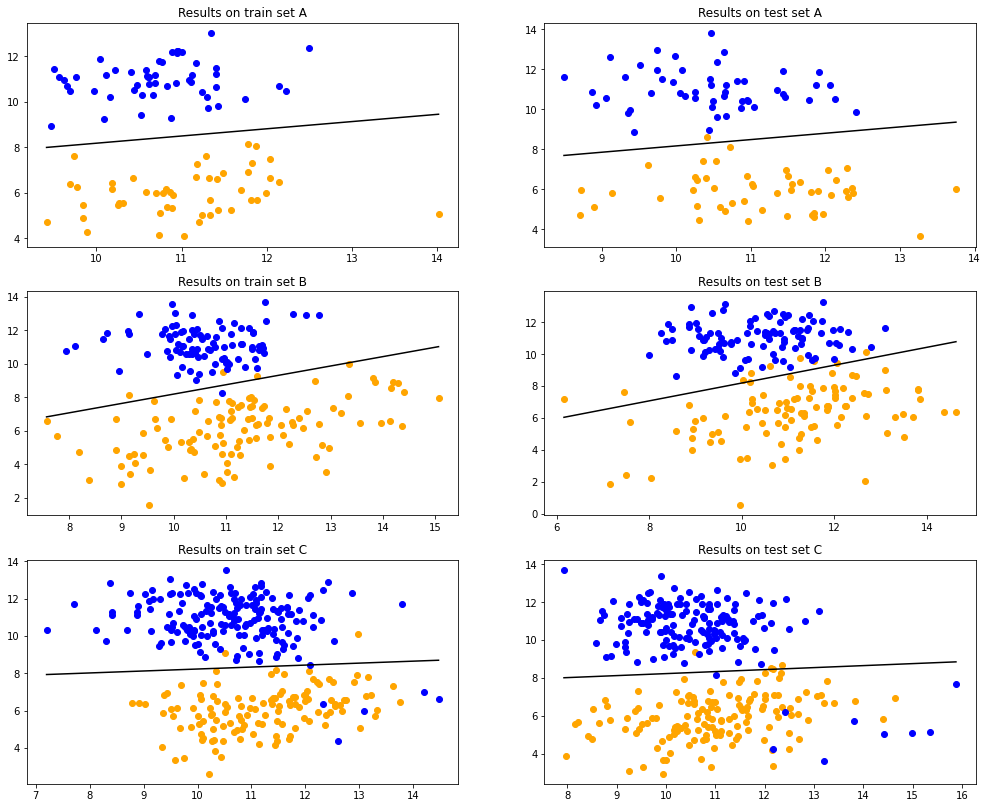

In [14]:
plt.subplots(3,2,figsize=(17,14))
plt.subplot(3,2,1)
plot_graph(X_trainA,Y_trainA,modelA_MLE['w'],modelA_MLE['b'])
plt.title('Results on train set A')
plt.subplot(3,2,2)
plot_graph(X_testA,Y_testA,modelA_MLE['w'],modelA_MLE['b'])
plt.title('Results on test set A')
plt.subplot(3,2,3)
plot_graph(X_trainB,Y_trainB,modelB_MLE['w'],modelB_MLE['b'])
plt.title('Results on train set B')
plt.subplot(3,2,4)
plot_graph(X_testB,Y_testB,modelB_MLE['w'],modelB_MLE['b'])
plt.title('Results on test set B')
plt.subplot(3,2,5)
plot_graph(X_trainC,Y_trainC,modelC_MLE['w'],modelC_MLE['b'])
plt.title('Results on train set C')
plt.subplot(3,2,6)
plot_graph(X_testC,Y_testC,modelC_MLE['w'],modelC_MLE['b'])
plt.title('Results on test set C')
plt.show()

## 1. Logistic Regression

**Implement logistic regression for an affine function f(x)=w⊺x+b (do not forget the constant term).**

For one $x_{i}$ we have:
$$f(x_{i}) = w^T x_{i} + b $$
$$\hat{y}_{i} = sigmoid(f(x_{i}))$$
The loglikelihood is : 
$$ \mathcal{L}(\hat{y}_{i}, y_{i}) =  - y_{i}  \log(\hat{y}_{i}) - (1-y_{i} )  \log(1-\hat{y}_{i})$$

The cost is then computed by summing over all training examples:
$$ J = \frac{1}{m} \sum_{i=1}^m \mathcal{L}(\hat{y}_{i}, y_{i})$$

From this we can compute :
$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (\hat{y}_{i}-y_{i})$$

with :
$$Y =
 \begin{pmatrix} 
y_{1} & ... & y_{n}  \\
\end{pmatrix} \\$$

$$X =
 \begin{pmatrix} 
 \vdots &  & \vdots \\
x_{1} & ... & x_{n}  \\
\vdots &  & \vdots \\
\end{pmatrix} \\$$

And with a learning rate $\eta$ we will update $w$ and $b$ at each iteration :
$$ w = w - \eta \frac{\partial J}{\partial w}$$
$$ b = b - \eta \frac{\partial J}{\partial b}$$

In [15]:
def Logistic_reg(X_train, Y_train, X_test, Y_test, num_iterations=2000, learning_rate=0.5):
    w = np.zeros((X_train.shape[0],1))
    b = 0.
    m = X_train.shape[1]

    for i in range(num_iterations):
    
        A = sigmoid(np.dot(w.T,X_train)+b)

        dw = 1/m*np.dot(X_train,(A-Y_train).T)
        db = 1/m*np.sum(A-Y_train)

        w = w - learning_rate*dw
        b = b - learning_rate*db
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w,b,X_train)
    
    d = {
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b}
    return d

**a. Give the numerical values of the parameters learnt.**

**Results for File A**

In [16]:
modelA = Logistic_reg(X_trainA, Y_trainA, X_testA, Y_testA, num_iterations=1000, learning_rate=0.5)
Results(modelA,Y_trainA,Y_testA)

Learned parameters :
w =  [ 0.62058737 -0.78044605]
b = 0.07599522797185543
train accuracy: 100.0 %
test accuracy: 98.0 %


**Results for File B**

In [17]:
modelB = Logistic_reg(X_trainB, Y_trainB, X_testB, Y_testB, num_iterations=1000, learning_rate=0.5)
Results(modelB,Y_trainB,Y_testB)

Learned parameters :
w =  [ 0.61187558 -0.75791261]
b = 0.226222802079435
train accuracy: 98.0 %
test accuracy: 96.5 %


**Results for File C**

In [18]:
modelC = Logistic_reg(X_trainC, Y_trainC, X_testC, Y_testC, num_iterations=1000, learning_rate=0.5)
Results(modelC,Y_trainC,Y_testC)

Learned parameters :
w =  [ 0.36237746 -0.58501257]
b = 0.7255638309098644
train accuracy: 96.66666666666667 %
test accuracy: 96.0 %


**b. Represent graphically the data as a point cloud in $\mathbb{R}^{2}$ as well as the line defined by the equation.**

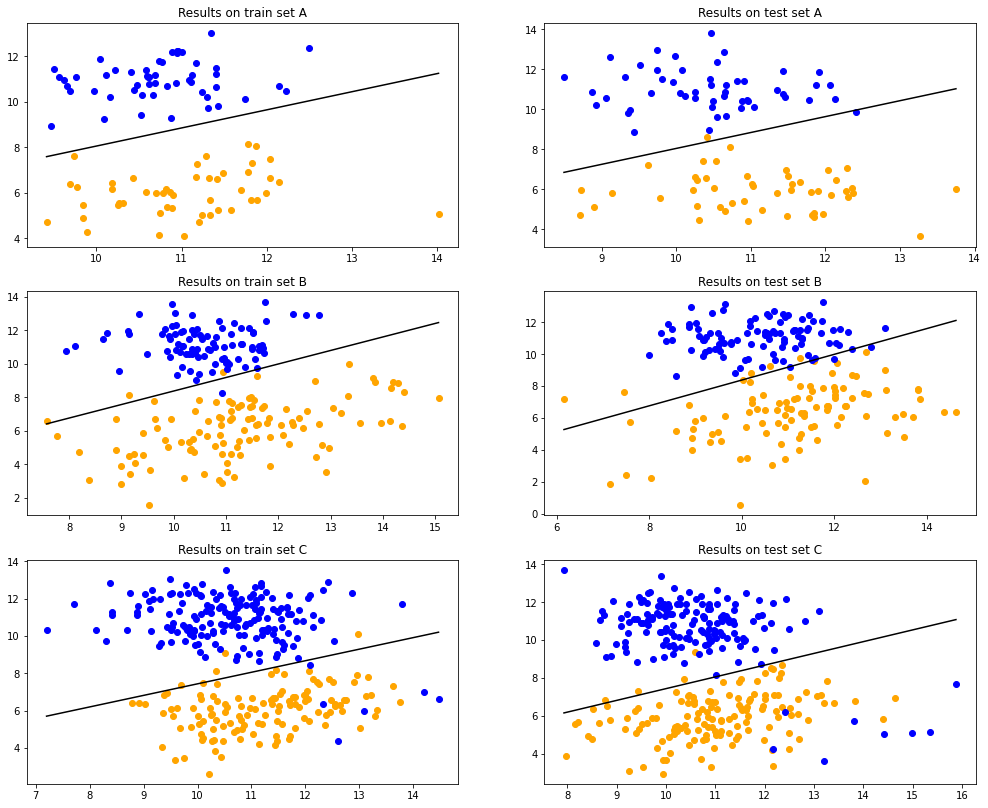

In [19]:
plt.subplots(3,2,figsize=(17,14))
plt.subplot(3,2,1)
plot_graph(X_trainA,Y_trainA,modelA['w'],modelA['b'])
plt.title('Results on train set A')
plt.subplot(3,2,2)
plot_graph(X_testA,Y_testA,modelA['w'],modelA['b'])
plt.title('Results on test set A')
plt.subplot(3,2,3)
plot_graph(X_trainB,Y_trainB,modelB['w'],modelB['b'])
plt.title('Results on train set B')
plt.subplot(3,2,4)
plot_graph(X_testB,Y_testB,modelB['w'],modelB['b'])
plt.title('Results on test set B')
plt.subplot(3,2,5)
plot_graph(X_trainC,Y_trainC,modelC['w'],modelC['b'])
plt.title('Results on train set C')
plt.subplot(3,2,6)
plot_graph(X_testC,Y_testC,modelC['w'],modelC['b'])
plt.title('Results on test set C')
plt.show()

## 3. Linear regression

**a. Provide the numerical values of the learnt parameters.**

Let ${ \left\{(x_i​,y_i​) \right\} }_{1⩽i⩽n}$ $\subset \mathbb{R}^{d} \times \mathbb{R}$ be a i.i.d sample of n observations. 

We have $\forall i=1,...,n$,  $y_i =  w^T x_i + b$.

Using the matrix notations, we have : $Y = X\theta $ 
with : 

$$Y =
\begin{pmatrix} 
y_{1}  \\
\vdots \\
y_{n} \\
\end{pmatrix} \\$$

$$\theta =
\begin{pmatrix} 
w_{1}  \\
\vdots \\
w_{d} \\
b
\end{pmatrix} \\$$


$$X =
 \begin{pmatrix} 
x_{1}^\top & 1  \\
\vdots & \vdots \\
x_{n}^\top & 1
\end{pmatrix} \\$$

We obtain $\theta$ by minimizing the least square error :
$$
\theta^{*} \in \underset{\theta \in \mathbb{R}^{d+1}}{\arg\min} \|{X \theta - Y}\|_{2}^{2}
$$

It gives the following equation :
$$\theta^{*\mathsf{T}} X^{\mathsf{T}} X \theta^{*} + Y^{\mathsf{T}} Y - 2 \theta^{*\mathsf{T}} X^{\mathsf{T}} Y = 0$$

And we finally get :
$$
\theta^{*} = (X^{\mathsf{T}} X)^{-1} X^{\mathsf{T}} Y
$$

In [4]:
def linear_reg(X_train,Y_train):
	n = X_train.shape[1]
	X = X_train.T
	X = np.column_stack((X,np.ones((n,1))))
	Y = Y_train.T
	Pseudo_inv_X = np.linalg.pinv(X)
	Theta = np.dot(Pseudo_inv_X,Y)
	Theta[-1] -= 0.5  
	#because we have y=0 or y=1 and the equation of the line in the plot_graph function is w1*x1 + w2*x2 + b = 0 
	#Here we want w1*x1 + w2*x2 + b = 1/2 which can be rewritten : w1*x1 + w2*x2 + (b-1/2)=0
	return Theta/np.linalg.norm(Theta)

**Results for File A**

In [9]:
ThetaA = linear_reg(X_trainA,Y_trainA)
print('Learned parameters :')
print('w = ',ThetaA[:-1])
print('b =', ThetaA[-1])

Learned parameters :
w =  [[ 0.06184719]
 [-0.19539427]]
b = [0.9787727]


**Results for File B**

In [22]:
ThetaB = linear_reg(X_trainB,Y_trainB)
print('Learned parameters :')
print('w = ',ThetaB[:-1])
print('b =', ThetaB[-1])

Learned parameters :
w =  [[ 0.19746208]
 [-0.35286863]]
b = [0.91459962]


**Results for File C**

In [23]:
ThetaC = linear_reg(X_trainC,Y_trainC)
print('Learned parameters :')
print('w = ',ThetaC[:-1])
print('b =', ThetaC[-1])

Learned parameters :
w =  [[ 0.01455273]
 [-0.1380798 ]]
b = [0.99031419]


**b. Represent graphically the data as a point cloud in $\mathbb{R}^{2}$ as well as the line defined by the equation.**

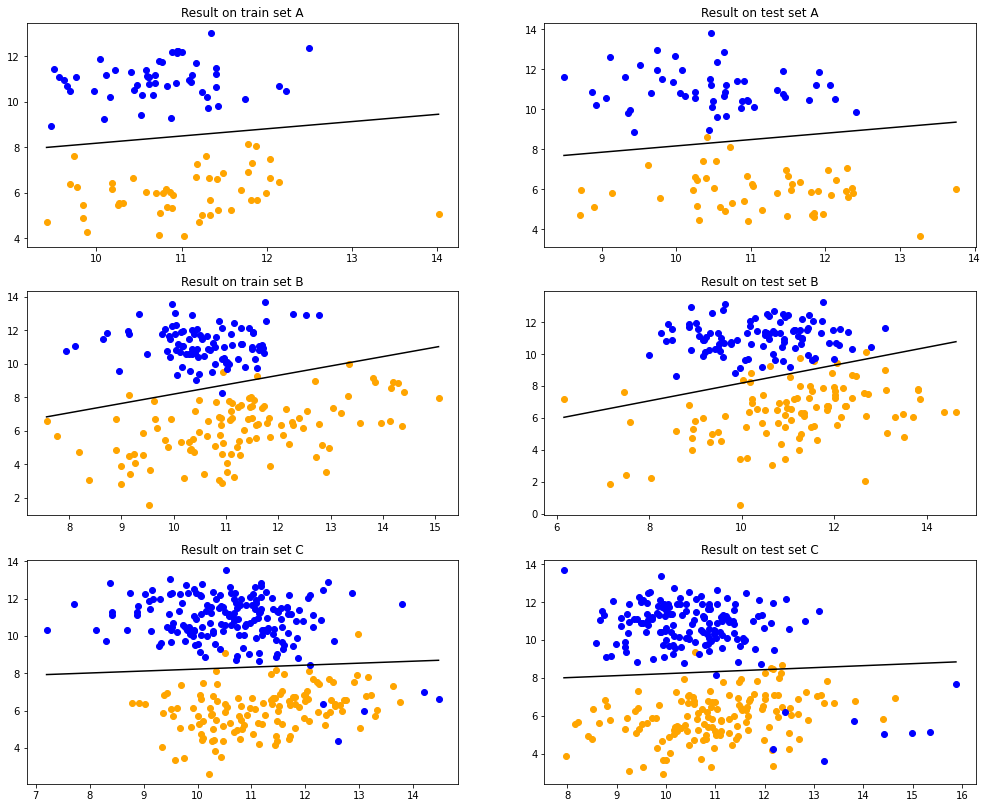

In [24]:
plt.subplots(3,2,figsize=(17,14))
plt.subplot(3,2,1)
plot_graph(X_trainA,Y_trainA,ThetaA[:-1],ThetaA[-1])
plt.title('Result on train set A')
plt.subplot(3,2,2)
plot_graph(X_testA,Y_testA,ThetaA[:-1],ThetaA[-1])
plt.title('Result on test set A')
plt.subplot(3,2,3)
plot_graph(X_trainB,Y_trainB,ThetaB[:-1],ThetaB[-1])
plt.title('Result on train set B')
plt.subplot(3,2,4)
plot_graph(X_testB,Y_testB,ThetaB[:-1],ThetaB[-1])
plt.title('Result on test set B')
plt.subplot(3,2,5)
plot_graph(X_trainC,Y_trainC,ThetaC[:-1],ThetaC[-1])
plt.title('Result on train set C')
plt.subplot(3,2,6)
plot_graph(X_testC,Y_testC,ThetaC[:-1],ThetaC[-1])
plt.title('Result on test set C')
plt.show()

## 4. Application

**a. Compute for each model the misclassification error (i.e. the fraction of the data misclassified) on the training data and compute it as well on the test data.**

In [25]:
errors = np.zeros((3,6))
def error_LR(Model,Y_test,Y_train):
	err = np.array([np.mean(np.abs(Model['Y_prediction_train'] - Y_train)) * 100,np.mean(np.abs(Model['Y_prediction_test'] - Y_test)) * 100])
	return err
def error_LinReg(Theta,X_test,X_train,Y_test,Y_train):
	fx_test = np.dot(X_test.T,Theta[:-1])+Theta[-1]
	fx_train = np.dot(X_train.T,Theta[:-1])+Theta[-1]
	Y_pred_test = np.reshape((fx_test>0).astype(int),(1,Y_test.shape[1]))
	Y_pred_train = np.reshape((fx_train>0).astype(int),(1,Y_train.shape[1]))
	err = np.array([np.mean(np.abs(Y_pred_train - Y_train)) * 100,np.mean(np.abs(Y_pred_test - Y_test)) * 100])
	return err



In [26]:
errors[0,0:2] = error_LR(modelA_MLE,Y_testA,Y_trainA)
errors[0,2:4] = error_LR(modelB_MLE,Y_testB,Y_trainB)
errors[0,4:] = error_LR(modelC_MLE,Y_testC,Y_trainC)
errors[1,0:2] = error_LR(modelA,Y_testA,Y_trainA)
errors[1,2:4] = error_LR(modelB,Y_testB,Y_trainB)
errors[1,4:] = error_LR(modelC,Y_testC,Y_trainC)
errors[2,0:2] = error_LinReg(ThetaA,X_testA,X_trainA,Y_testA,Y_trainA)
errors[2,2:4] = error_LinReg(ThetaB,X_testB,X_trainB,Y_testB,Y_trainB)
errors[2,4:] = error_LinReg(ThetaC,X_testC,X_trainC,Y_testC,Y_trainC)

**Percentage of misclassified points :**

In [31]:
columns = ['Train A','Test A','Train B','Test B','Train C','Test C']
index = ['LDA','Logistic Reg','Linear Reg']
df = pd.DataFrame(data=errors,index=index,columns=columns)
print(df)

              Train A  Test A  Train B  Test B   Train C  Test C
LDA               0.0     1.0      2.0     4.5  2.666667     4.0
Logistic Reg      0.0     2.0      2.0     3.5  3.333333     4.0
Linear Reg        0.0     1.0      2.0     4.5  2.666667     4.0


**b. Compare the performances of the different methods on the three datasets. Is the misclassification error larger, smaller, or similar on the training and test data? Why? Which methods yield very similar/dissimilar results? Which methods yield the best results on the different datasets ? Provide an interpretation.**

The misclassification error is always smaller on the training data set, which is logical since we learn the parameters from the training data. On the test datasets, the misclassification error is very small for each model which means that the models generalize really well each dataset.

We notice that for each method dataset A has the smallest misclassification errors. This is because the data is linearly separable and the points are far from the gap separating the two classes except for one or two points in the test set which eventually become the misclassified points. The datasets B and C, on the other hand, cannot be separated by a hyperplane.

The results obtained with the LDA model and the linear regression  are very similar. On the other hand, the logistic regression yields different results than the LDA model and the linear regression. 
On the dataset B, the logistic regression gives the best results whereas the LDA and the linear regression yield the best results on the dataset A. On the dataset C, however, there is no model that outstands. Indeed, the MLE method and the linear regression yield better results than the logistic regression on train C but the results on test C are identical for all the methods.

Lastly, when we compare the graphs of the linear regression and the logistic regression we notice that the slope of the hyperplane separating the data tends to be steeper for the logistic regression than for the linear regression. This is because linear regression is more sensitive to outlayer points and therefore when the latters exist they affect the values of the parameters.

# 2, Gaussian mixtue models and EM

## 1. Math

The objective of the EM algorithm is to maximize the log-likelihood $L_{(x_i)_i}\left(\pi,\theta\right) = \log(p((x_i)_i | \pi, \theta)) $ by increasing it at each iteration. 

We first rewrite the Gaussian mixture model by introducing new variables such that observations are now drawn conditionnally on their components ($k=1,...,K$ the indices for the components):

$Z_i \sim \mathcal{M}(1,\pi)$ $\forall i=1,...,n$ iid

$X_i | Z_{ik} = 1 \sim \mathcal{N}(\mu_k,\Sigma_k)$

We then write the variational decomposition of the log-likelihood : $L_{(x_i)_i}\left(\pi,\theta\right) = \mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta) + KL\left(R((z_i)_i || p((z_i)_i | (x_i)_i,\pi, \theta) \right)$

With $\mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta) = \sum_{(z_i)_i} R((z_i)_i \log \frac{p((z_i)_i, (x_i)_i | \pi, \theta)}{R((z_i)_i} $ , $KL$ the kullback-leibler divergence and $R$ any law on all the $z_i$.

## E-step :
We fix $(\pi,\theta)$ and we want to maximize $\mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta)$ with respect to $R$.

$L_{(x_i)_i}\left(\pi,\theta\right)$ does not depend on the law $R$. Then, $\mathcal{L}$ is maximal when $KL$ is minimal, i.e when $KL\left(R((z_i)_i || p((z_i)_i | (x_i)_i,\pi, \theta) \right) = 0$

From this we get : $ R((z_i)_i) = p((z_i)_i | (x_i)_i,\pi, \theta) = \prod_{i=1}^n p(z_i | x_i,\pi, \theta)$

And by using Bayes' rule we have : $p(z_i | x_i,\pi, \theta) = \prod_{k=1}^K \tau_{ik}^{z_{ik}}$ with $\tau_{ik} = \frac{\pi_k \mathcal{N}(x_i;\mu_k,\Sigma_k)}{\sum_{l=1}^K \pi_l\mathcal{N}(x_i;\mu_l,\Sigma_l)}$

$\rightarrow$ **The density $p(z_i | x_i,\pi, \theta)$ only depends on the $\tau_{ik}$ so the E-step will be to calculate the $\tau_{ik}$**


## M-step :
We fix $R((z_i)_i)$ and we want to maximize $\mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta)$ with respect to $(\pi,\theta)$.

We have : $\mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta) = \mathbb{E}_{(z_i)_i}\left[\log(p((z_i)_i, (x_i)_i | \pi, \theta))\right] + cte$

We finally have to maximize :
$\mathbb{E}_{(z_i)_i}\left[\log(p((z_i)_i, (x_i)_i | \pi, \theta))\right] = \sum_{i=1}^n \sum_{k=1}^K \tau_{ik} \log(\pi_k\mathcal{N}(\mu_k,\Sigma_k))$ with respect to $(\pi,\theta)$.

The calculation is similar to what was done in question a. of part "Generative model (LDA)".

The parameters $(\pi,\theta)$ that maximize this expectation are :

$\hat{\pi}_k = \frac{1}{n} \sum_{i=1}^{n} \tau_{ik}$

$\hat{\mu}_k = \frac{1}{n_k} \sum_{i=1}^{n} \tau_{ik} x_i$ with $n_k = \sum_{i=1}^n \tau_{ik}$

$\hat{\Sigma}_k = \frac{1}{n_k} \sum_{i=1}^{n} \tau_{ik} \left(x_i - \hat{\mu}_k\right)\left(x_i - \hat{\mu}_k\right)^\top$

$\rightarrow$ **The M-step is finally to compute $\hat{\pi}_k$, $\hat{\mu}_k$ and $\hat{\Sigma}_k$.**

The log-likelihood $L_{(x_i)_i}\left(\pi,\theta\right)$ will increase at each step because we first maximize because at the end of the E-step we have $L_{(x_i)_i}\left(\pi,\theta\right) = \mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta)$ with $\mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta)$ maximal with respect to $R$ and during M-step we maximize $\mathcal{L}\left(R((z_i)_i\right) ; \pi, \theta)$ with respect to $(\pi,\theta)$.

## 2. Implementation

In [103]:
#We read the data
data = open(path+'decathlon.csv','r')
data_decath = data.readlines()
data.close()
Data_decath = np.zeros((10,41))
Sports_list = np.zeros(10)
i = 0
for line in data_decath:
	line = line.split(',')
	if i==0: Sports_list = np.array(list(map(str,line[1:])))
	if i>0:
		X = np.array(list(map(float,line[1:])))
		Data_decath[:,i-1] = X
	i+=1

#The size of Data_decath is dxn (d=10 and n=41)

In [104]:
#Compute the distance between two points
def distance(a,b):
	return(np.sqrt(np.sum((a-b)**2,axis=0)))

#compute multivariate Gaussian
def multivariate_normal(X,mu,Sigma):
	d = len(mu)  
	Sigma_inv = np.linalg.inv(Sigma)
	Sigma_det = np.linalg.det(Sigma)
	g = -1/2*(X-mu).T @ Sigma_inv @ (X-mu)
	G = np.exp(g[0,0])/(Sigma_det*(2*np.pi)**d)**(1/2)
	return G

**Initialization : Kmeans**

We use a kmeans ++ algortihm to initialize the values of the $\tau_{ik}$ :

$\tau_{ik} = 1$ if the point $i$ is in the cluster $k$.

$\tau_{ik} = 0$ otherwise. 

The initialization of the barycenters is done as follows :

1. We randomly choose a point in our data set -> it is our first barycenter.

2. We compute the distances between the centers and all the data points. 

3. For each point we keep the minimal distance between this point and all the centers. 

4. The probability of choosing this point as the new barycenter is proportional to this distance. 

5. We repeat those steps until K centers have been chosen


In [105]:
def init_barycenter(Data,K):  #K : nb of clusters
	d, n = Data.shape[0], Data.shape[1]
	Centers = np.zeros((K,d))  #will contain our barycenters
	a = np.random.randint(n)  # we randomly choose a point in our data set. This point is our first barycenter
	Centers[0,:] = Data[:,a]
	mask = np.ones(n, dtype=bool)
	mask[a]= False
	B = Data[:,mask]  #B is the data points matrix without the barycenters
	for k in range(K-1):
		nk = B.shape[1]
		Distances = np.zeros((k+1,nk))  #size (nb de centre)x(n-nb de centre) : distances between centers and all data points
		for i in range(k+1):
			A = np.reshape(Centers[i,:],(d,1))
			dist = distance(A,B)
			Distances[i,:] = dist
		Proba = np.min(Distances,axis=0)
		Proba *= Proba
		Proba = Proba/np.sum(Proba)
		c = np.random.choice(np.arange(nk),p = Proba)  #The new barycenter is chosen with a probability proportional to the minimum distance to the centers.
		Centers[k+1,:]=B[:,c]
		mask = np.ones(nk, dtype=bool)
		mask[c]= False
		B = B[:,mask]  #We update B
	return Centers

In [106]:
#Kmeans ++
def Kmeans(Data,K,IterMax = 1000):  #K : nb of clusters
	d, n = Data.shape[0], Data.shape[1]
	Centers = init_barycenter(Data,K)
	Tau = np.zeros((K,n))
	Sum = []
	for t in range(IterMax):
		s = 0
		New_Tau = np.zeros((K,n))
		#gives Tau with the actual centers
		for i in range(n):
			A = np.reshape(Data[:,i],(d,1))
			B = Centers.T
			dist = distance(A,B)
			ind = int(np.argmin(dist))
			New_Tau[ind,i]=1
			s += np.min(dist**2)

		#gives the new centers with the actual Tau
		for k in range(K):
			mask = np.array(New_Tau[k,:],dtype=bool)
			Clust = Data[:,mask]
			Nk = np.sum(New_Tau[k,:])
			Bary = np.sum(Clust,axis=1)
			Centers[k,:] = Bary/Nk
		
		Sum.append(s)
		#Stop criterion
		if np.all((Tau - New_Tau) == 0) : break  #we stop when there is no change in the Tau matrix
		Tau = np.copy(New_Tau)
	print('Number of iterations in kmeans : ',t)
		
	return Tau,Sum

Number of iterations in kmeans :  4


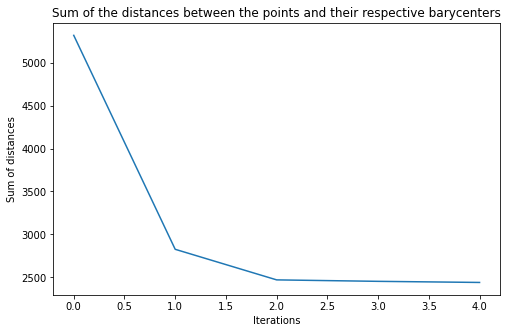

In [107]:
Tau_decath, Sum_decath = Kmeans(Data_decath,3)
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(Sum_decath)),Sum_decath)
plt.xlabel('Iterations')
plt.ylabel('Sum of distances')
plt.title('Sum of the distances between the points and their respective barycenters')
plt.show()

The kmean algorithm seems to converge correctly and quickly.

**EM algorithm**

In [108]:
#Function that compute Tau for pi, mu and sigma given
def E_step(Pi,Mu,Sigma,X):
	d = X.shape[0]
	n = X.shape[1]
	K = Mu.shape[0]
	Tau = np.zeros((K,n))
	log_like = 0  #to compute the log-likelihood
	for i in range(n):
		xi = np.reshape(X[:,i],(d,1))
		l = np.zeros(K)
		for k in range(K):
			Mu_k = np.reshape(Mu[k,:],(d,1))
			Sigma_k = np.reshape(Sigma[k,:,:],(d,d))
			#At some point there is a negative eigenvalue very close to zero and it causes an overflow in the exponential. 
			# We avoid this by adding the identity matrix multiplied by 10e-10 to the matrix Sigma
			Sigma_k += 1e-10*np.eye(d)
			Tau[k,i] = Pi[k]*multivariate_normal(xi,Mu_k,Sigma_k)
			l[k] = Tau[k,i]
		Tau[:,i] /= np.sum(Tau[:,i])
		log_like += np.log(np.sum(l))
	return Tau,log_like

In [109]:
#Function that compute pi, mu and sigma for a given Tau
def M_step(tau,data):
	K = tau.shape[0]
	n = tau.shape[1]
	d = data.shape[0]
	#Pi
	Pi = 1/n*np.sum(tau, axis=1)  #size K
	Pi = np.reshape(Pi,(K,1))
	
	#Mu
	N = np.sum(tau,axis=1)   #size K
	Mu = np.dot(tau,data.T)/np.reshape(N,(K,1)) #size kxd

	#Sigma
	Sigma = np.zeros((K,d,d))
	for k in range(K):
		Mu_k = np.reshape(Mu[k,:],(d,1))
		tau_k = np.reshape(tau[k,:],(1,n))
		s = np.dot((data - Mu_k)*tau_k,(data-Mu_k).T)/N[k]
		Sigma[k,:,:] = s

	return Pi,Mu,Sigma


In [110]:
def EM(Data,K,IterMax=2000):
	#Data shape : n x d
	#K : nb of cluster
	n = Data.shape[0]
	Tau,_ = Kmeans(Data,K)
	Log_like = [0]
	for i in range(IterMax):
		Pi,Mu,Sigma = M_step(Tau,Data)              #M-step
		Tau,log_like = E_step(Pi,Mu,Sigma,Data)     #E-step

		Log_like.append(log_like)
		#Stop criterion
		if np.abs(log_like-Log_like[i]) < 10e-6: break
	
	d = {
         "Pi": Pi, 
         "Mu" : Mu, 
         "Sigma" : Sigma,
		 "Log-likelihood" : Log_like[1:]}
	
	print('Number of iterations in EM : ',i)
	return d

Number of iterations in kmeans :  2
Number of iterations in EM :  8


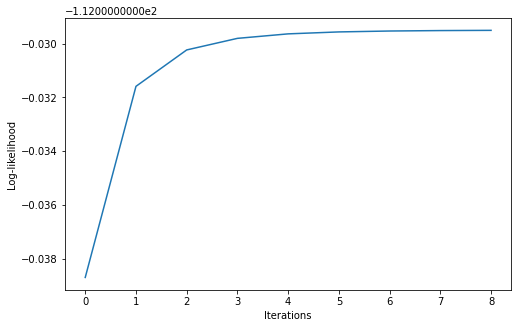

In [111]:
EM_decath = EM(Data_decath, 3)
pi, mu, Sigma = EM_decath['Pi'], EM_decath['Mu'], EM_decath['Sigma']
Log_like = EM_decath['Log-likelihood']
plt.figure(figsize=(8,5))
plt.plot(np.arange(len(Log_like)),Log_like)
plt.xlabel('Iterations')
plt.ylabel('Log-likelihood')
plt.show()

**Results with only two dimensions**

In [112]:
def plot_graph_EM(Data,mu,Sigma,pi,ax,dims):
    ax.scatter(mu[:,0], mu[:,1], c='tab:orange', s=100*pi)
    ax.scatter(Data[dims[0],:], Data[dims[1],:], c='tab:blue', alpha=.7)
    for i in range(len(mu)):
        w, v = np.linalg.eigh(Sigma[i])
        w = .3 * w**.5
        angle = np.math.atan2(v[0,1], v[0,0])*180/np.pi
        for mul in [3, 5, 8]:
            ax.add_patch(Ellipse(mu[i], mul*w[0], mul*w[1], angle,
                            facecolor='none', edgecolor='tab:orange', linestyle='--', linewidth=.4+.4*mul*pi[i]))
    ax.set(xlabel = Sports_list[dims[0]], ylabel = Sports_list[dims[1]])

In [113]:
dims1 = [0,4]
EM_decath1 = EM(Data_decath[dims1,:], 3)
pi1, mu1, Sigma1 = EM_decath1['Pi'], EM_decath1['Mu'], EM_decath1['Sigma']

dims2 = [6,8]
EM_decath2 = EM(Data_decath[dims2,:], 3)
pi2, mu2, Sigma2 = EM_decath2['Pi'], EM_decath2['Mu'], EM_decath2['Sigma']

dims3 = [1,3]
EM_decath3 = EM(Data_decath[dims3,:], 3)
pi3, mu3, Sigma3 = EM_decath3['Pi'], EM_decath3['Mu'], EM_decath3['Sigma']

Number of iterations in kmeans :  2
Number of iterations in EM :  56
Number of iterations in kmeans :  5
Number of iterations in EM :  50
Number of iterations in kmeans :  3
Number of iterations in EM :  32


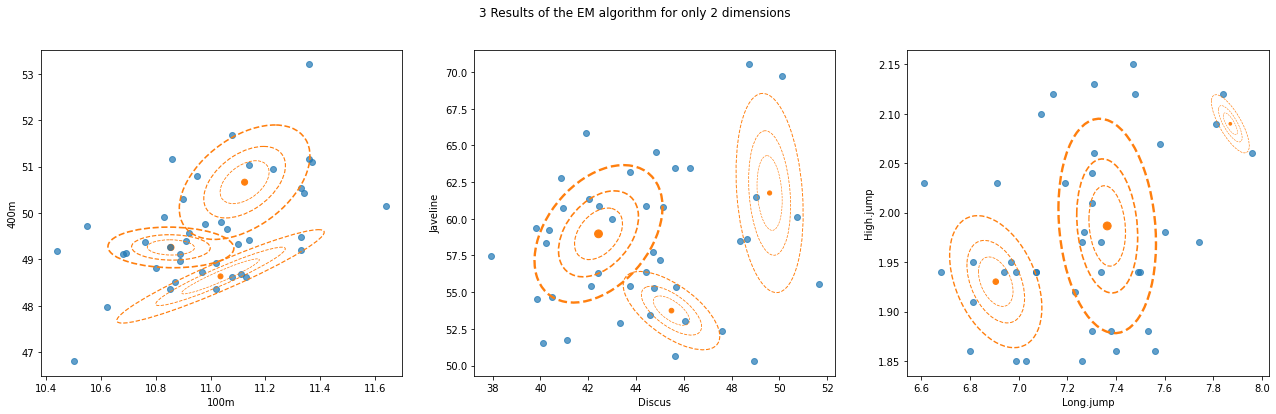

In [114]:
fig, (ax1,ax2,ax3)  = plt.subplots(1,3,figsize=(22,6))
fig.suptitle('3 Results of the EM algorithm for only 2 dimensions')
plot_graph_EM(Data_decath,mu1,Sigma1,pi1,ax1,dims1)
plot_graph_EM(Data_decath,mu2,Sigma2,pi2,ax2,dims2)
plot_graph_EM(Data_decath,mu3,Sigma3,pi3,ax3,dims3)

plt.show()

## Comments:

First we can note that the log-likelihood increases as expected and converges quickly. 
We have few points for a problem of dimension 10. Maybe it is ambitious to hope to obtain good results under these conditions. 
One can nevertheless test the algorithm with only 2 dimensions of the problem and obtain a graphic representation of the results. This is what we did for the 3 examples above. The ellipses associated to the different components of the Gaussian mixture model seem to match the data correctly. 